In [1]:
import sys

sys.path.append('../../../Fedot.Industrial')

In [2]:
import copy
from core.architecture.postprocessing.cv_results_parser import *
from typing import Dict

def exp_list(config: Dict, folds = [0, 1],  n = [0, 1, 2, 3, 4]):
    pruning_ratio = [p['pruning_ratio'] for p in config['sfp_params']['zeroing']['percentage']]
    energy_threshold = [e['energy_threshold'] for e in config['sfp_params']['zeroing']['energy']]
    hoer_loss_factor = config['svd_params']['hoer_loss_factor']
    orthogonal_loss_factor = config['svd_params']['orthogonal_loss_factor']
    root = f"summary/{config['ds_name']}/{config['model_name']}"
    exps = {'Baseline': [f"{root}_{i}_{f}" for i in n for f in folds]}
    sfp_exps = {
        'energy': {},
        'percentage': {},
    }
    for pr in pruning_ratio:
        sfp_exps['percentage'][f'SFP {pr * 100}%'] = [f'{root}_{i}_{f}_SFP_pruning_ratio-{pr}' for i in n for f in folds]
    for e in energy_threshold:
        sfp_exps['energy'][f'SFP energy {e}'] = [f'{root}_{i}_{f}_SFP_energy_threshold-{e}' for i in n for f in folds]
    svd_exps = {
        'channel': {},
        'spatial': {},
    }
    for mode in ['channel', 'spatial']:
        for hoer in hoer_loss_factor:
            for ort in orthogonal_loss_factor:
                svd_exps[mode][f'Hoer {hoer} Ort {ort}'] = [f'{root}_{i}_{f}_SVD_{mode}_O-{ort}_H-{hoer}' for i in n for f in folds]
    return exps, sfp_exps, svd_exps

In [3]:
from exp_parameters import TASKS
baseline, sfp_exps, svd_exps = exp_list(TASKS['FashionMNIST'])

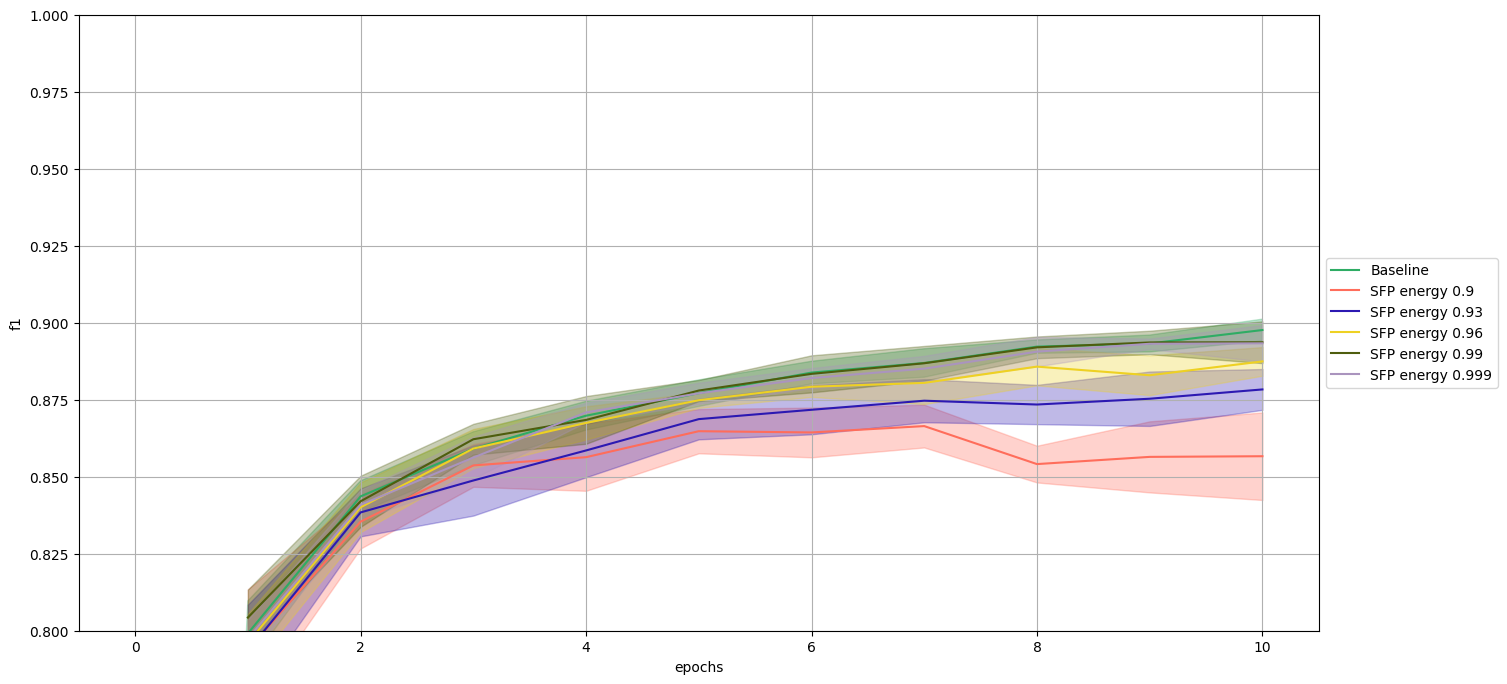

In [4]:
exps = {**baseline}
exps.update(sfp_exps['energy'])
ax = show_mean_train_scores(
    exps=exps,
    metric='f1',
    # show_std=False,
    ylim=(0.8, 1)
    # saving_path='f1.png'
)

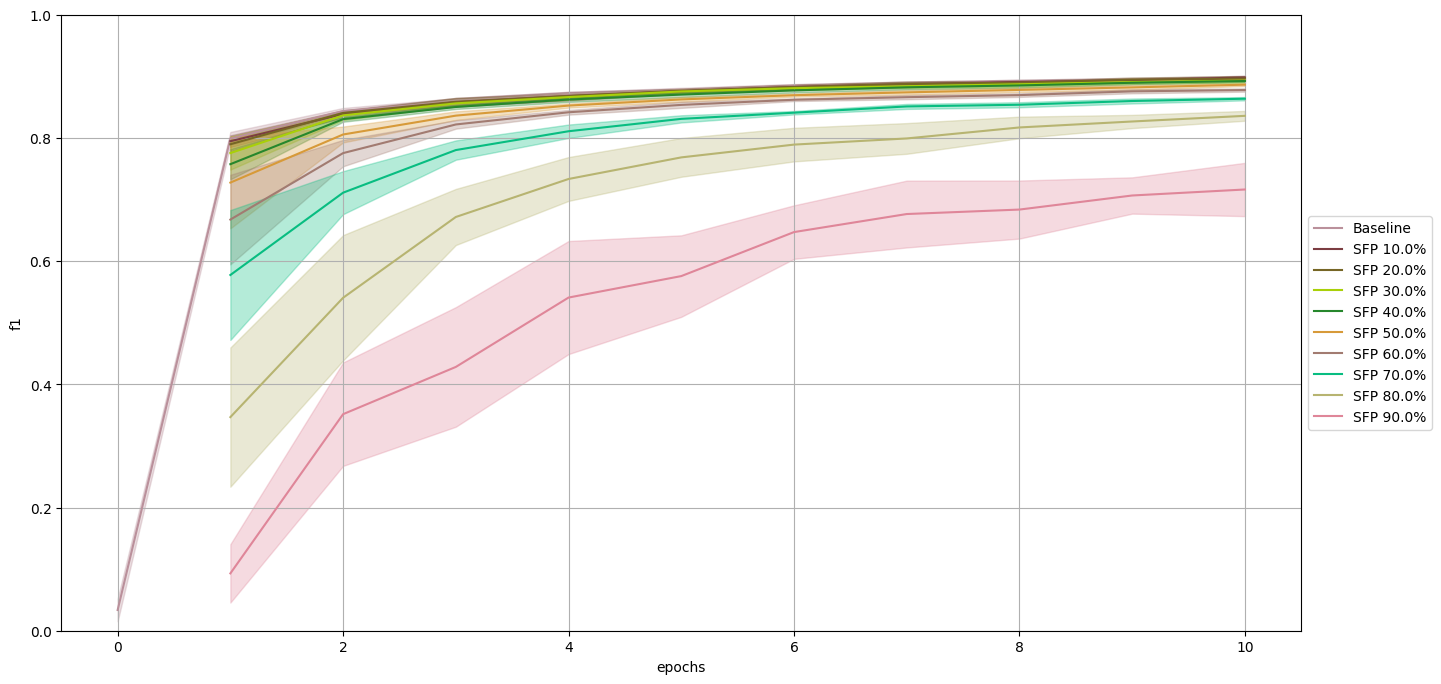

In [4]:
exps = {**baseline}
exps.update(sfp_exps['percentage'])
ax = show_mean_train_scores(
    exps=exps,
    metric='f1',
    # show_std=False,
    ylim=(0, 1)
    # saving_path='f1.png'
)

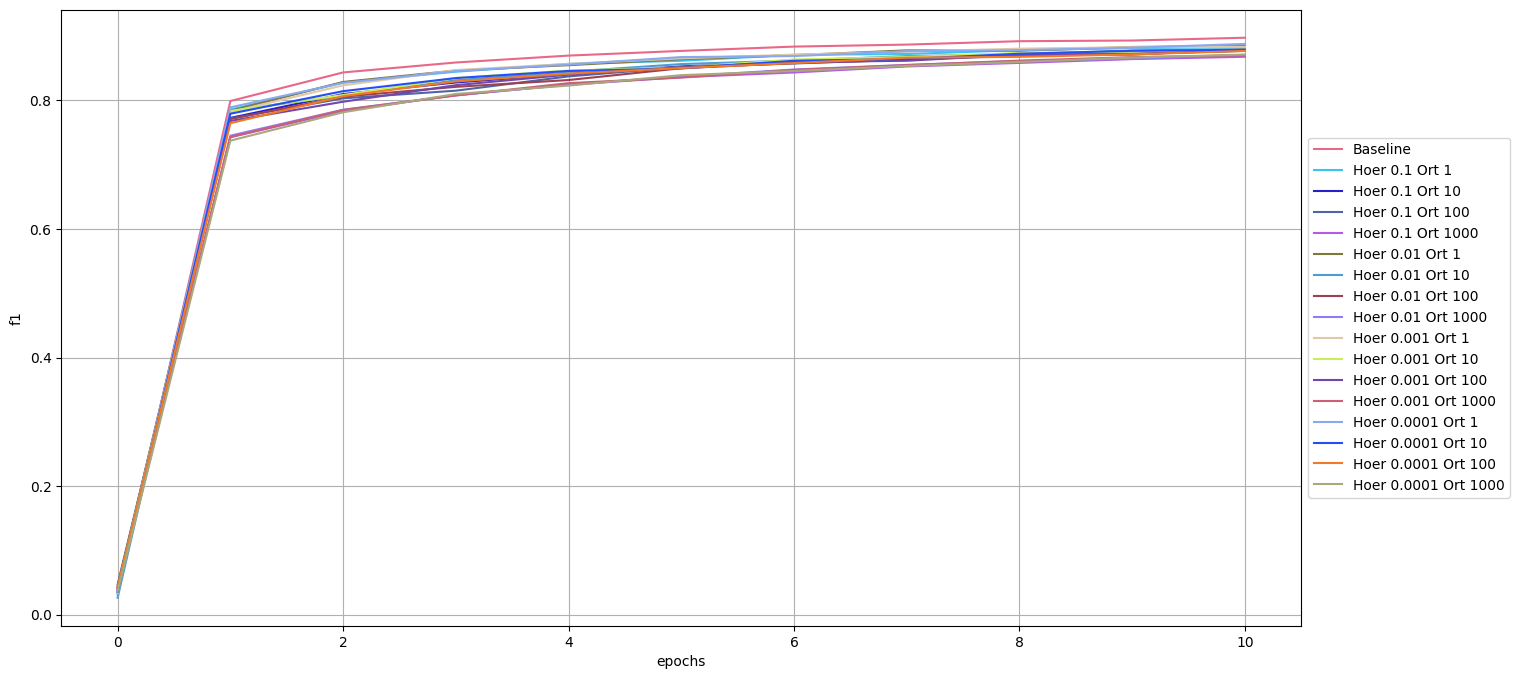

In [5]:
exps = {**baseline}
exps.update(svd_exps['channel'])
ax = show_mean_train_scores(
    exps=exps,
    metric='f1',
    show_std=False,
    # ylim=(0, 1)
    # saving_path='f1.png'
)

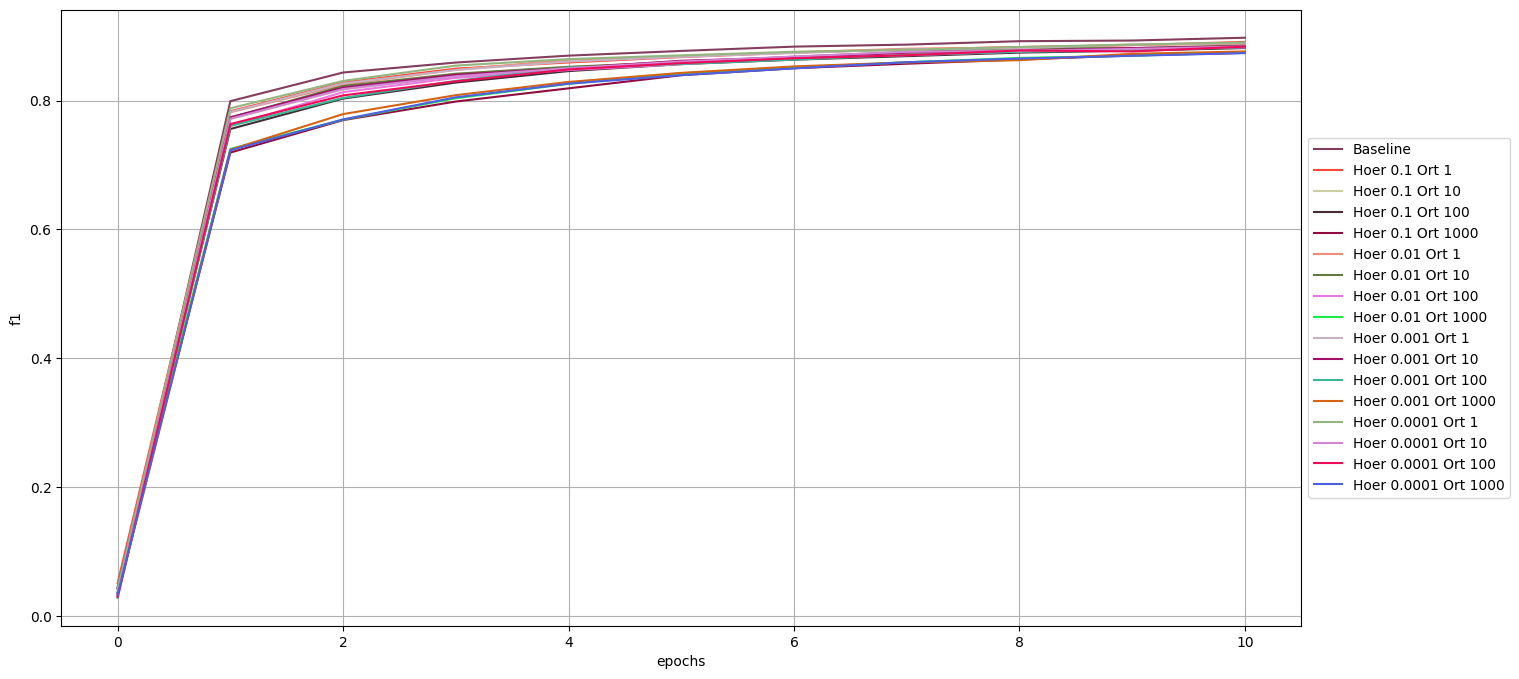

In [6]:
exps = {**baseline}
exps.update(svd_exps['spatial'])
ax = show_mean_train_scores(
    exps=exps,
    metric='f1',
    show_std=False,
    # ylim=(0, 1)
    # saving_path='f1.png'
)

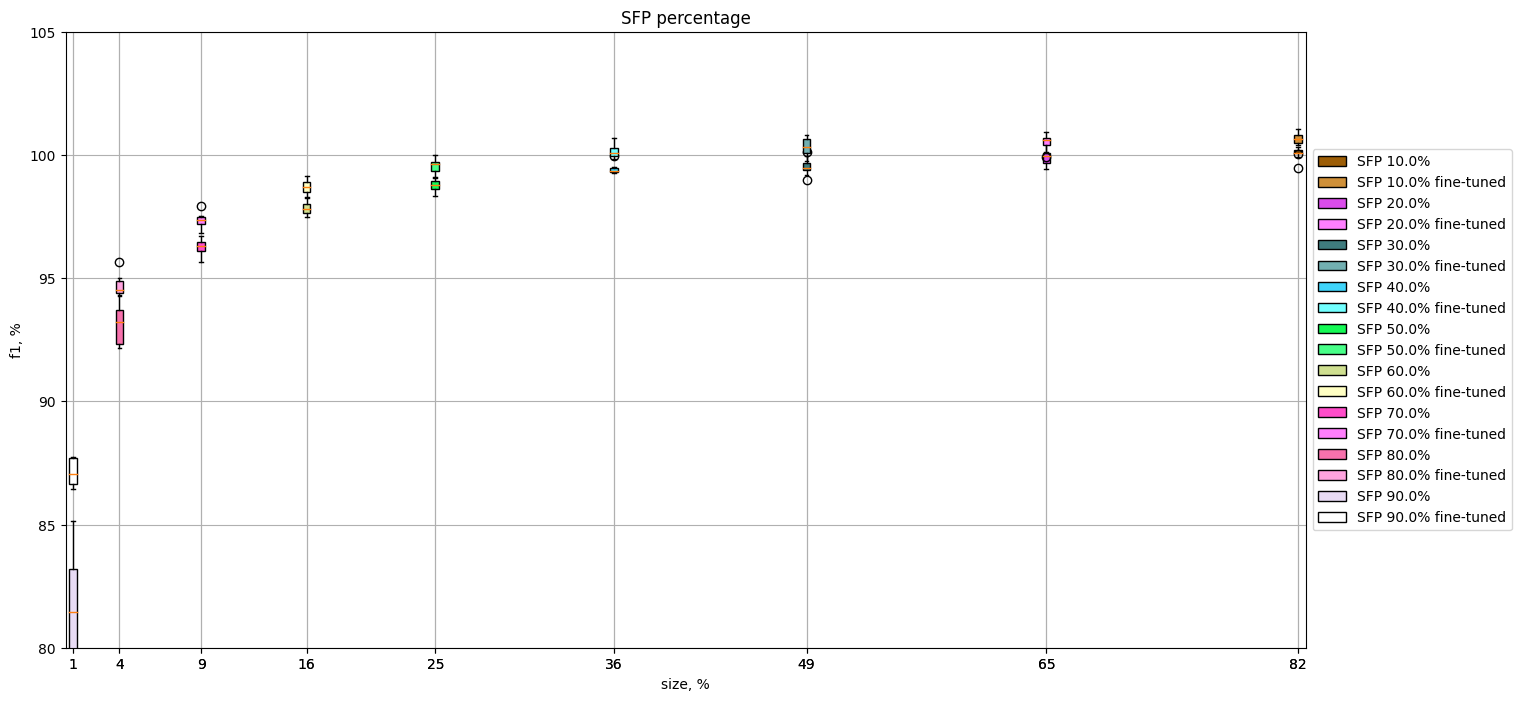

In [8]:
ax = show_mean_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=sfp_exps['percentage'],
    metric='f1',
    pruning=True,
    finetuning=True,
    # show_std=False,
    title='SFP percentage',
    ylim=(80, 105)
)

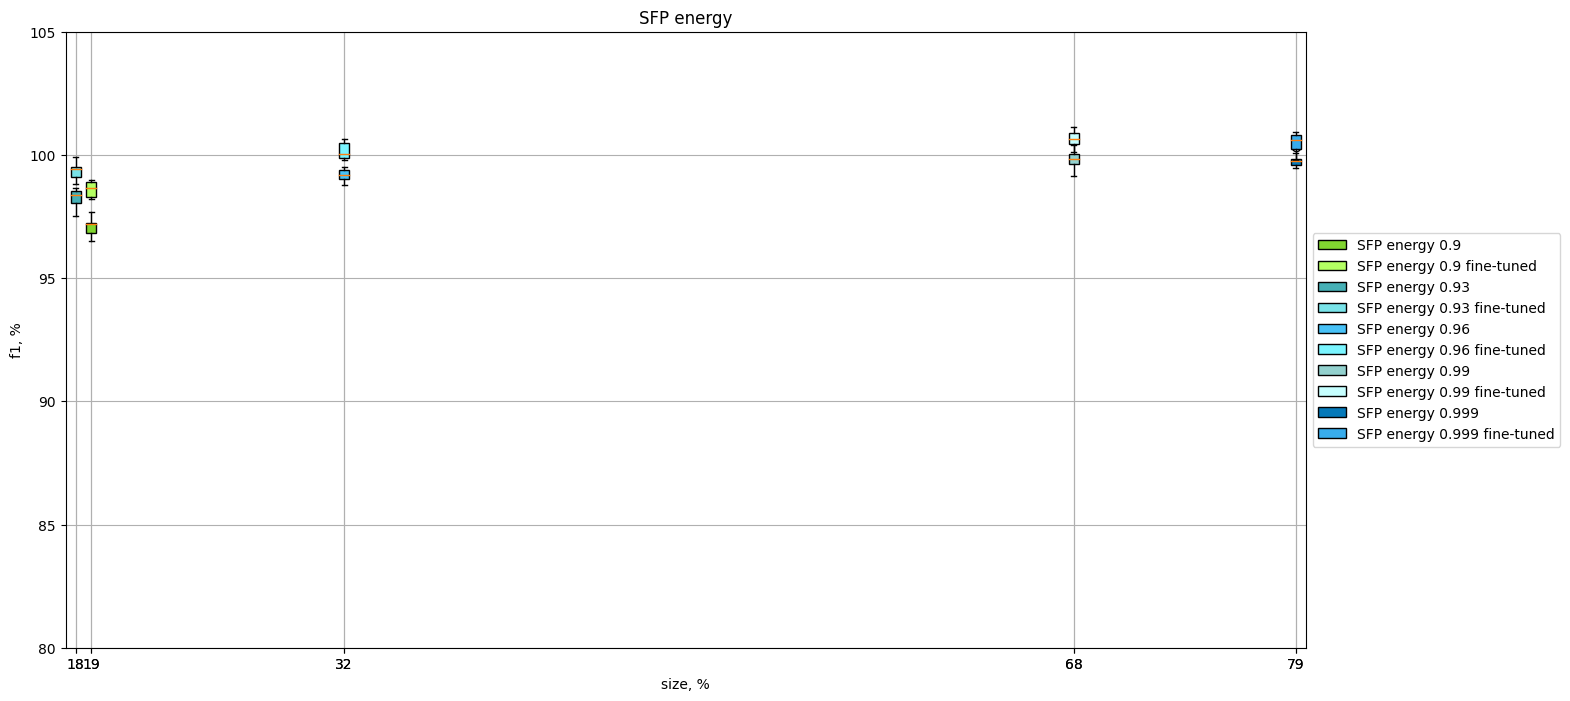

In [9]:
ax = show_mean_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=sfp_exps['energy'],
    metric='f1',
    pruning=True,
    finetuning=True,
    # show_std=False,
    title='SFP energy',
    ylim=(80, 105)
)

In [12]:
channel_exps = {k: v for k, v in svd_exps['channel'].items() if 'Hoer 0.01' in k}

In [22]:
channel_exps = {k: v for k, v in svd_exps['channel'].items() if k.endswith('Ort 10')}

In [32]:
channel_exps = {k: v for k, v in svd_exps['channel'].items() if 'Hoer 0.1' in k and not k.endswith('Ort 1000')}

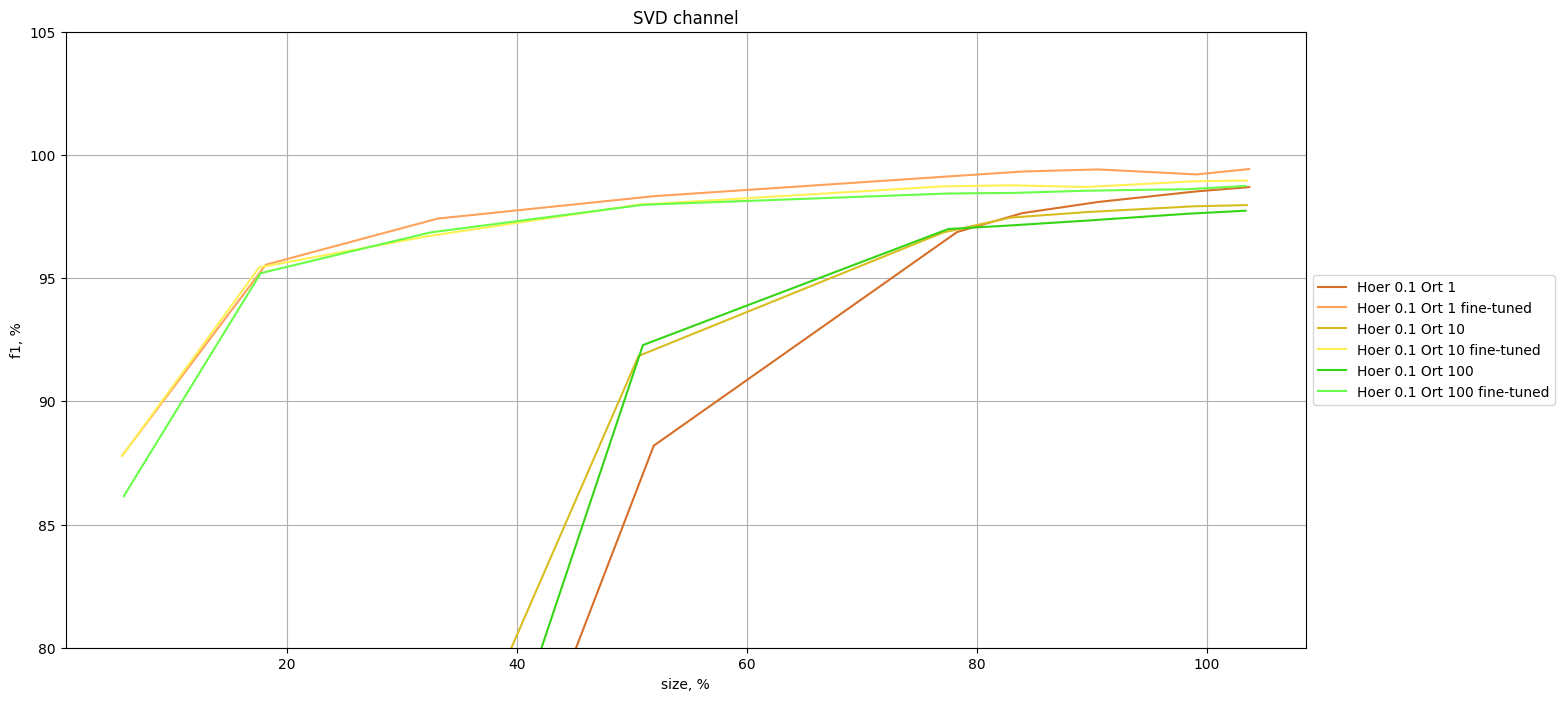

In [33]:
ax = show_mean_svd_results(
    baseline=exps['Baseline'],
    svd_exps=channel_exps,
    metric='f1',
    pruning=True,
    finetuning=True,
    show_std=False,
    title='SVD channel',
    ylim=(80, 105)
)

In [38]:
spatial_exps = {k: v for k, v in svd_exps['spatial'].items() if 'Hoer 0.1' in k}

In [42]:
spatial_exps = {k: v for k, v in svd_exps['spatial'].items() if k.endswith('Ort 10')}

In [44]:
spatial_exps = {k: v for k, v in svd_exps['spatial'].items() if 'Hoer 0.1' in k and not k.endswith('Ort 1000')}

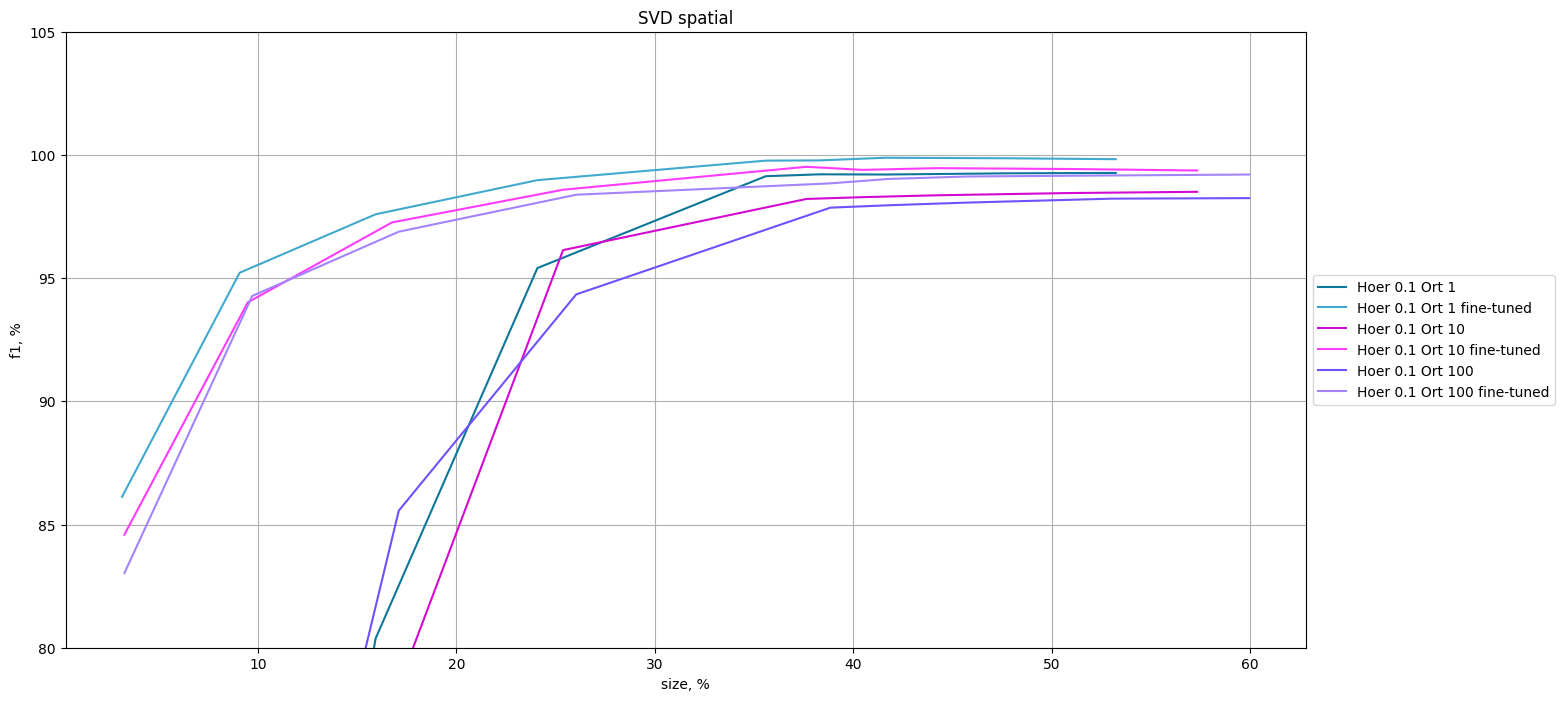

In [49]:
ax = show_mean_svd_results(
    baseline=exps['Baseline'],
    svd_exps=spatial_exps,
    metric='f1',
    pruning=True,
    finetuning=True,
    show_std=False,
    title='SVD spatial',
    ylim=(80, 105)
)

In [50]:
all_sfp = copy.deepcopy(sfp_exps['energy'])
all_sfp.update(sfp_exps['percentage'])
best_svd_exps = {
    'channel': channel_exps['Hoer 0.1 Ort 1'],
    'spatial': spatial_exps['Hoer 0.1 Ort 1'],
}

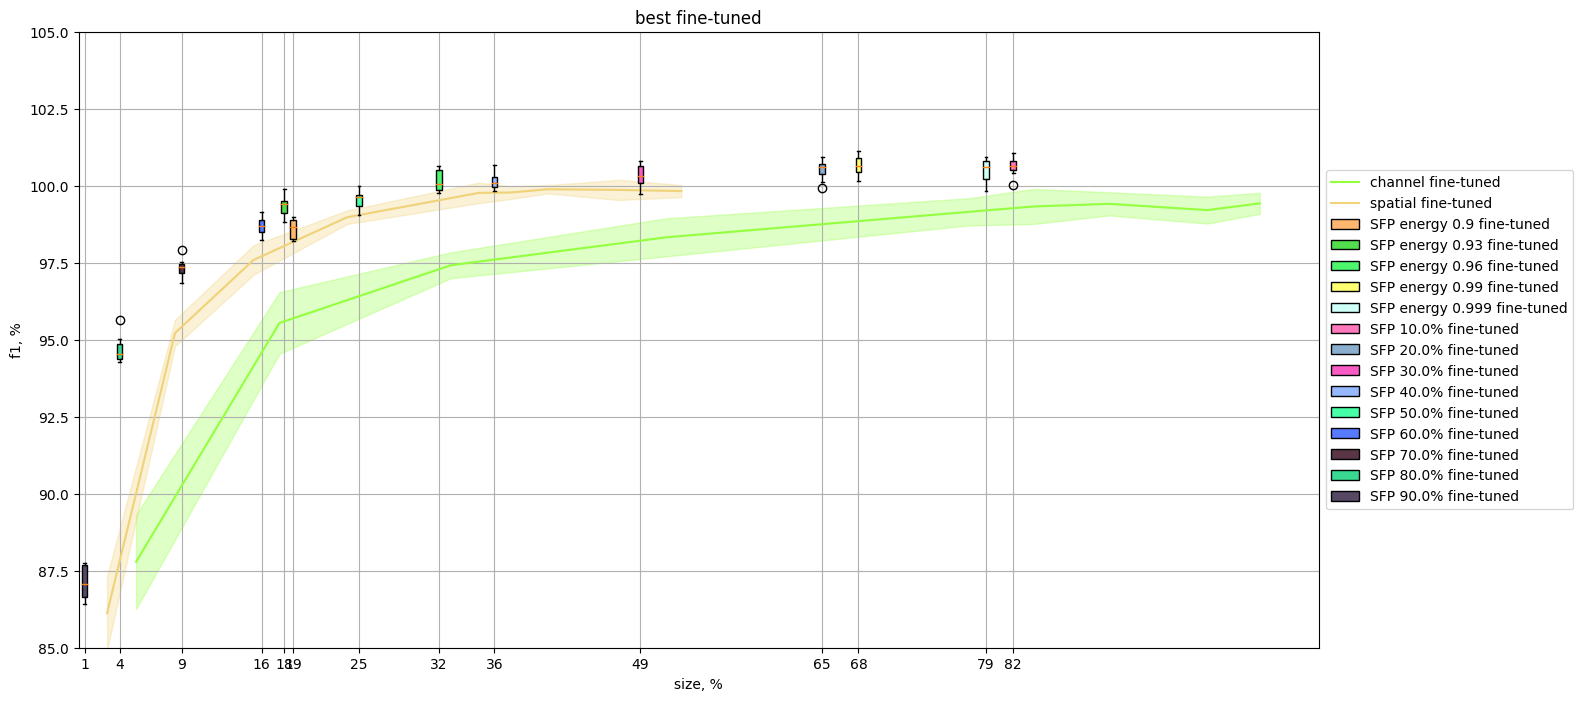

In [53]:
ax = show_mean_svd_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=all_sfp,
    svd_exps=best_svd_exps,
    metric='f1',
    pruning=False,
    finetuning=True,
    # show_std=False,
    title='best fine-tuned',
    ylim=(85, 105)
)